In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.linear_model import LinearRegression

In [2]:
def remove_units(x):
    if type(x) == str:
        """Find the non-numeric charater and its index number"""
        first_str = [char for char in x if not char.isdigit() and char != '.'][0]
        index_no = x.find(first_str)
        
        """Find the non-numeric charater and its index number"""
        return float(x[:index_no])

In [3]:
def get_epa_estimate_param(x, y):
    df_epa = df1[[x,y]].dropna()
    y = np.array(df_epa[y]).reshape(-1,1)
    x = np.array(df_epa[x]).reshape(-1,1)
    reg1 = LinearRegression()
    reg1.fit(x,y)
    return reg1.coef_, reg1.intercept_

In [4]:
def get_epa_estimate(item):
    if np.isnan(item[0]) and ~np.isnan(item[1]):
        return coefficient * item[1] + yintercept
    else:
        return item[0]

In [5]:
def mi_to_km(item):
    return 1.60934*item

In [6]:
FILENAME = glob.glob('output_new.*')[0]

In [7]:
df = pd.read_excel(FILENAME, index_col=0)

In [8]:
df_range = df[['WLTP (Worldwide harmonized Light vehicles Test Procedure)','EPA (Electric car range and efficiency)']].dropna()

In [9]:
df_range = df_range[['WLTP (Worldwide harmonized Light vehicles Test Procedure)','EPA (Electric car range and efficiency)']].applymap(lambda x:remove_units(x))

In [10]:
df_range.rename(columns = {'WLTP (Worldwide harmonized Light vehicles Test Procedure)': 'WLTP [mi]',
                          'EPA (Electric car range and efficiency)': 'EPA [mi]'}, inplace = True)

In [11]:
# g = sns.jointplot(x = 'EPA [mi]', y = 'WLTP [mi]', kind = 'reg', data = df_range)

# def annotate(data, **kws):
#     r, p = stats.pearsonr(df_range['EPA [mi]'], df_range['WLTP [mi]'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, EPA={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# plt.xlabel('EPA [mi]', fontweight='bold', fontsize = 'large')
# plt.ylabel('WLTP [mi]', fontweight='bold', fontsize = 'large')
# plt.show()

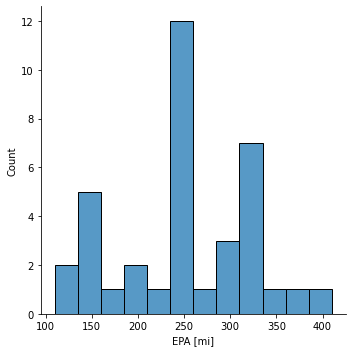

In [12]:
sns.displot(df_range, x="EPA [mi]", binwidth=25)

<AxesSubplot:xlabel='WLTP [mi]', ylabel='Count'>

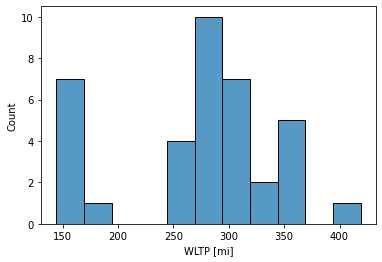

In [13]:
sns.histplot(df_range, x='WLTP [mi]', binwidth=25)

In [14]:
df.columns

Index(['Brand', 'Model', 'Model year', 'Market', 'Price', 'Trim',
       'Model alias', 'Series', 'Type of rechargeable battery',
       'Battery capacity', 'Number of cells', 'Number of modules', 'Voltage',
       'Weight', 'Volume', 'Location', 'Cooling', 'Manufacturer',
       'Energy density', 'Minimum ambient temperature',
       'Maximum ambient temperature', 'Top speed',
       'Acceleration from 0 to 100 km/h', 'Acceleration from 0 to 60 mph',
       'Acceleration from 80 to 120 km/h', 'Body style', 'Materials',
       'Exterior colors', 'Interior colors', 'Number of doors',
       'Number of seats', 'Length', 'Width', 'Height', 'Wheelbase',
       'Front track', 'Rear track', 'Minimum clearance', 'Front legroom',
       'Rear legroom', 'Trunk volume', 'Maximum trunk volume', 'Curb weight',
       'Payload', 'GVWR', 'Drag coefficient',
       'WLTP (Worldwide harmonized Light vehicles Test Procedure)',
       'EPA (Electric car range and efficiency)',
       'NEDC (New European

In [15]:
cols_to_include = ['Model year','Type of rechargeable battery',
                   'Battery capacity', 'Number of cells', 
                   'Number of modules', 'Voltage',
                   'Cooling', 'Top speed',
                   'Acceleration from 0 to 100 km/h','Materials',
                   'Curb weight','GVWR', 'Body style',
                  'WLTP (Worldwide harmonized Light vehicles Test Procedure)',
                  'EPA (Electric car range and efficiency)',
                  'NEDC (New European Driving Cycle)']

In [16]:
df1 = df[cols_to_include]

In [17]:
cols_to_clean_dict = {
    'Battery capacity': 'Battery capacity (kWh)',
    'Voltage': 'Voltage (V)',
    'Top speed': 'Top Speed (mph)',
    'Acceleration from 0 to 100 km/h': 'Acceleration from 0 to 100 km/h (s)',
    'Curb weight': 'Curb weight (lb)',
    'GVWR': 'GVWR (lb)',
    'WLTP (Worldwide harmonized Light vehicles Test Procedure)': 'WLTP (mi)',
    'EPA (Electric car range and efficiency)': 'EPA (mi)',
    'NEDC (New European Driving Cycle)': 'NEDC (mi)'
}

In [18]:
cols_to_clean = list(cols_to_clean_dict.keys())

In [19]:
df1[cols_to_clean] = df1[cols_to_clean].applymap(lambda x:remove_units(x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
df1.rename(columns = cols_to_clean_dict, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [21]:
df1.columns

Index(['Model year', 'Type of rechargeable battery', 'Battery capacity (kWh)',
       'Number of cells', 'Number of modules', 'Voltage (V)', 'Cooling',
       'Top Speed (mph)', 'Acceleration from 0 to 100 km/h (s)', 'Materials',
       'Curb weight (lb)', 'GVWR (lb)', 'Body style', 'WLTP (mi)', 'EPA (mi)',
       'NEDC (mi)'],
      dtype='object')

In [22]:
# Change range units to km
df1['EPA (mi)'] = df1['EPA (mi)']*1.60934
df1['WLTP (mi)'] = df1['WLTP (mi)']*1.60934
df1['NEDC (mi)'] = df1['NEDC (mi)']*1.60934

df1.rename(columns = {
    'EPA (mi)': 'EPA (km)',
    'WLTP (mi)': 'WLTP (km)',
    'NEDC (mi)': 'NEDC (km)'
}, inplace= True)

C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/299650256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EPA (mi)'] = df1['EPA (mi)']*1.60934
C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/299650256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WLTP (mi)'] = df1['WLTP (mi)']*1.60934
C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/299650256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [23]:
coefficient, yintercept = np.array(1.05607395690293),np.array(-57.1834136348728)

In [24]:
coefficient, yintercept

(array(1.05607396), array(-57.18341363))

In [25]:
col = ['EPA (km)','WLTP (km)']
df1['EPA (km)'] = df1[col].apply(lambda x: get_epa_estimate(x), axis=1)

C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/1349690928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EPA (km)'] = df1[col].apply(lambda x: get_epa_estimate(x), axis=1)


In [26]:
df1['EPA (km)'].dropna().shape

(227,)

In [27]:
coefficient, yintercept = np.array(0.969126940504384),np.array(-61.5402495170663)

In [28]:
coefficient, yintercept = get_epa_estimate_param(x='NEDC (km)', y = 'EPA (km)')
col = ['EPA (km)','NEDC (km)']
df1['EPA (km)'] = df1[col].apply(lambda x: get_epa_estimate(x), axis=1)

C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/629367455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EPA (km)'] = df1[col].apply(lambda x: get_epa_estimate(x), axis=1)


In [29]:
df1['EPA (km)'].dropna().shape

(227,)

In [30]:
df1.columns

Index(['Model year', 'Type of rechargeable battery', 'Battery capacity (kWh)',
       'Number of cells', 'Number of modules', 'Voltage (V)', 'Cooling',
       'Top Speed (mph)', 'Acceleration from 0 to 100 km/h (s)', 'Materials',
       'Curb weight (lb)', 'GVWR (lb)', 'Body style', 'WLTP (km)', 'EPA (km)',
       'NEDC (km)'],
      dtype='object')

In [31]:
# Change other coulmns to SI units
df1['Top Speed (mph)'] = df1['Top Speed (mph)'] * 1.60934

df1['GVWR (lb)'] = df1['GVWR (lb)']*0.453592
df1['Curb weight (lb)'] = df1['Curb weight (lb)']*0.453592

df1.rename(columns={
    'Top Speed (mph)': 'Top Speed (km/h)',
    'Curb weight (lb)': 'Curb weight (kg)',
    'GVWR (lb)': 'GVWR (kg)'
}, inplace=True)

C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/3136564322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Top Speed (mph)'] = df1['Top Speed (mph)'] * 1.60934
C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/3136564322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GVWR (lb)'] = df1['GVWR (lb)']*0.453592
C:\Users\Moin\AppData\Local\Temp/ipykernel_24396/3136564322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [32]:
df1.to_csv('output_new_refined_bootstap.csv', index=False)

In [33]:
df_range = df[['NEDC (New European Driving Cycle)', 'EPA (Electric car range and efficiency)','WLTP (Worldwide harmonized Light vehicles Test Procedure)']]

In [34]:
df_range = df_range.applymap(lambda x: remove_units(x))

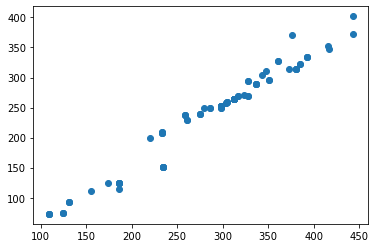

In [35]:
plt.scatter(df_range['NEDC (New European Driving Cycle)'], df_range['EPA (Electric car range and efficiency)'])

In [36]:
df_range1 = df_range[['EPA (Electric car range and efficiency)','WLTP (Worldwide harmonized Light vehicles Test Procedure)']].dropna()
df_range2 = df_range[['EPA (Electric car range and efficiency)','NEDC (New European Driving Cycle)']].dropna()

In [37]:
df_range1_km = df_range1.apply(lambda x: mi_to_km(x))
df_range2_km = df_range2.apply(lambda x: mi_to_km(x))

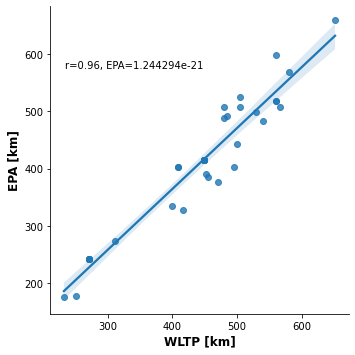

In [44]:
g = sns.lmplot(x = 'WLTP (Worldwide harmonized Light vehicles Test Procedure)', y = 'EPA (Electric car range and efficiency)', data = df_range1_km)

def annotate(data, **kws):
    r, p = stats.pearsonr(df_range1_km['WLTP (Worldwide harmonized Light vehicles Test Procedure)'], df_range1_km['EPA (Electric car range and efficiency)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, EPA={:e}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.xlabel('WLTP [km]', fontweight='bold', fontsize = 'large')
plt.ylabel('EPA [km]', fontweight='bold', fontsize = 'large')
plt.show()

Text(20.800000000000004, 0.5, 'EPA [km]')

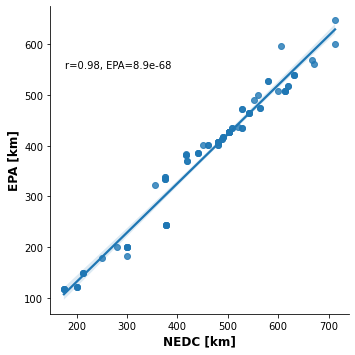

In [39]:
g = sns.lmplot(x = 'NEDC (New European Driving Cycle)', y = 'EPA (Electric car range and efficiency)', data = df_range2_km)

def annotate(data, **kws):
    r, p = stats.pearsonr(df_range2_km['NEDC (New European Driving Cycle)'], df_range2_km['EPA (Electric car range and efficiency)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, EPA={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.xlabel('NEDC [km]', fontweight='bold', fontsize = 'large')
plt.ylabel('EPA [km]', fontweight='bold', fontsize = 'large')

In [40]:
df1

,Model year,Type of rechargeable battery,Battery capacity (kWh),Number of cells,Number of modules,Voltage (V),Cooling,Top Speed (km/h),Acceleration from 0 to 100 km/h (s),Materials,Curb weight (kg),GVWR (kg),Body style,WLTP (km),EPA (km),NEDC (km)
0,2020,Lithium-Ion,95.0,432.0,36.0,396.0,Water-based coolant circulation,200.040962,6.6,StealAluminium,2489.997820,3129.997988,Coupe,435.970206,403.233367,NaN
1,2020,Lithium-Ion,95.0,432.0,36.0,396.0,Water-based coolant circulation,200.040962,6.6,StealAluminium,2489.997820,3129.997988,Sport utility vehicle (SUV),435.970206,403.233367,NaN
2,2020,Lithium-Ion,71.0,324.0,27.0,396.0,NaN,190.063054,6.8,StealAluminium,2370.000056,3039.996264,Coupe,346.973704,309.246479,NaN
3,2020,Lithium-Ion,71.0,324.0,27.0,396.0,Water-based coolant circulation,190.063054,6.8,StealAluminium,NaN,NaN,Sport utility vehicle (SUV),336.030192,297.689321,NaN
4,2019,NaN,82.0,NaN,NaN,NaN,NaN,179.924212,6.3,-,NaN,NaN,Sport utility vehicle (SUV),449.971464,418.019731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015,Lithium-Ion,24.2,264.0,27.0,323.0,Passive cooling,140.012580,10.4,Steel,1537.998930,1959.998248,Hatchback,NaN,133.575220,NaN
315,2014,Lithium-Ion,24.2,264.0,27.0,323.0,Passive cooling,140.012580,10.4,Steel,1509.998696,1959.998248,Hatchback,NaN,NaN,NaN
316,2021,Lithium-Ion,78.0,NaN,NaN,NaN,Water-based coolant circulation,179.924212,4.9,SteelAluminium,NaN,NaN,Sport utility vehicle (SUV),399.920990,334.742720,NaN
317,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hatchback,NaN,201.167500,NaN
